In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing required liabraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

# Testing model on just one frame

In [3]:
test_frame = plt.imread('/content/drive/MyDrive/task-2/frame_36.jpg') #

In [4]:
classes = None
with open('/content/drive/MyDrive/COOOclases.txt','r') as f:
  classes = [line.rstrip() for line in f.readlines()]


In [5]:
classes.index('diningtable') # index number of tables

60

In [6]:
classes.index('person') # index number of person

0

In [7]:
#Create and use the model
net = cv2.dnn.readNet('/content/drive/MyDrive/yolov3.weights', '/content/drive/MyDrive/darknet/cfg/yolov3.cfg')


In [8]:
#Get bounding boxes
def get_bounding_boxes(image):
  net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0), True, crop=False))
  layer_names = net.getLayerNames()
  output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  outs = net.forward(output_layers)
  class_ids = []
  confidences = []
  boxes = []
  Width = image.shape[1]
  Height = image.shape[0]
  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.1:
              center_x = int(detection[0] * Width)
              center_y = int(detection[1] * Height)
              w = int(detection[2] * Width)
              h = int(detection[3] * Height)
              x = center_x - w / 2
              y = center_y - h / 2
              class_ids.append(class_id)
              confidences.append(float(confidence))
              boxes.append([x, y, w, h])
  return (class_ids,confidences,boxes)


In [9]:
object_class, confid_lvl, rects = get_bounding_boxes(test_frame)

In [10]:
#To find all people in the image
def find_people_in_image(class_ids, confidences, boxes, image, draw_rect=False):
  indices_people = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)
  #check if is people detection
  people_rects = []
  for i in indices_people:
      i = i[0]
      box = boxes[i]

      if class_ids[i]==0:
          label = str(classes[0]) 

          if draw_rect: #We only need to draw the rectangles around detected objects for test purposes.
            cv2.rectangle(image, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 0, 0), 2)

          #cv2.putText(image, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
          people_rects.append((round(box[0]),round(box[1]),round(box[0]+box[2]),round(box[1]+box[3])))
  return people_rects

In [11]:
#To find all tables in the image
def find_tables_in_image(class_ids, confidences, boxes, image, draw_rect=False):
  indices_table = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)
  #check if is people detection
  table_rects = []
  for i in indices_table:
      i = i[0]
      box = boxes[i]

      if class_ids[i]==60:
          label = str(classes[60])

          if draw_rect: #We only need to draw the rectangles around detected objects for test purposes.
            cv2.rectangle(image, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 0, 0), 2)

          #cv2.putText(image, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
          table_rects.append((round(box[0]),round(box[1]),round(box[0]+box[2]),round(box[1]+box[3])))
  return table_rects

In [12]:
#People found in the frame
find_people_in_image(object_class, confid_lvl, rects, test_frame, draw_rect=True)

[(513, 338, 685, 542), (108, 230, 234, 398), (878, 209, 948, 311)]

In [13]:
#Tables found in the image
find_tables_in_image(object_class, confid_lvl, rects, test_frame, draw_rect=True)

[(352, 514, 578, 626)]

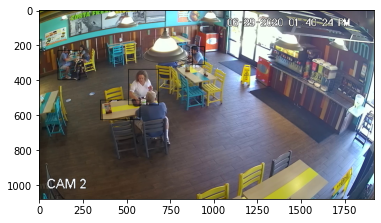

In [14]:
#Successfully found all the people in the image
plt.imshow(test_frame)

# Detecting people and tables in all images of the dataset.

In [15]:
#Now to get humans and tables in all the images

humans_in_frame = {}
tables_in_frame = {}

for frame_no in range(84): #loop over all frames in the dataset
  current_frame = str(frame_no)
  frame = plt.imread('/content/drive/MyDrive/task-2/frame_'+current_frame+'.jpg')

  # get bounding boxex of all 
  object_class, confid_lvl, rects = get_bounding_boxes(frame) 

  #save the bounding boxes of humans , tabels for each frame in the dicionary.
  #No need to draw the bounding boxes around images. 
  #we just need the co_ordinates of the bounding box.

  humans_in_frame['frame_'+current_frame] = find_people_in_image(object_class, confid_lvl, rects, frame)

  tables_in_frame['frame_'+current_frame] = find_tables_in_image(object_class, confid_lvl, rects, frame)

  print('frame_'+current_frame+' done')




frame_0 done
frame_1 done
frame_2 done
frame_3 done
frame_4 done
frame_5 done
frame_6 done
frame_7 done
frame_8 done
frame_9 done
frame_10 done
frame_11 done
frame_12 done
frame_13 done
frame_14 done
frame_15 done
frame_16 done
frame_17 done
frame_18 done
frame_19 done
frame_20 done
frame_21 done
frame_22 done
frame_23 done
frame_24 done
frame_25 done
frame_26 done
frame_27 done
frame_28 done
frame_29 done
frame_30 done
frame_31 done
frame_32 done
frame_33 done
frame_34 done
frame_35 done
frame_36 done
frame_37 done
frame_38 done
frame_39 done
frame_40 done
frame_41 done
frame_42 done
frame_43 done
frame_44 done
frame_45 done
frame_46 done
frame_47 done
frame_48 done
frame_49 done
frame_50 done
frame_51 done
frame_52 done
frame_53 done
frame_54 done
frame_55 done
frame_56 done
frame_57 done
frame_58 done
frame_59 done
frame_60 done
frame_61 done
frame_62 done
frame_63 done
frame_64 done
frame_65 done
frame_66 done
frame_67 done
frame_68 done
frame_69 done
frame_70 done
frame_71 done
fr

# Plotting graph

In [16]:
#Check if more than one table was found in any frames
for k,v in tables_in_frame.items():
  if len(v) > 1:
    print(k)
    break

We can only plot graph for one table since others were not detected.

In [17]:
#Estimate the number of people at this table in all the frames

table_box = (356, 494, 690, 634) #rectangle around the table

In [18]:
def calculate_centers(box_coordinates):
  x, y, w, h = box_coordinates
  centx = ((x+w) - x)//2
  centy = ((y+h) - y)//2

  return (centx, centy)

In [19]:
def calculate_distance(cent1, cent2):
  dist = np.sqrt( ((cent1[0]-cent2[0])*(cent1[0]-cent2[0])) + ((cent1[1]-cent2[1])*(cent1[1]-cent2[1])) )
  return dist

In [20]:
#We will now calculate the center of the bounding box of all people detected
#If this center is within a certain threshold of the bounding box of the table,
#The person wll be assumed to be sitting at the table.

table_center = calculate_centers(table_box)

threshold = 203
people_on_table = []

for box_list in humans_in_frame.values():
  
  if len(box_list) > 0:
    for box in box_list:
      count = 0
      box_center = calculate_centers(box)
      dist_betwn_cents = calculate_distance(table_center, box_center)

      if dist_betwn_cents < threshold:
        count += 1
    
    people_on_table.append(count)

  else:
    people_on_table.append(0)


  

    

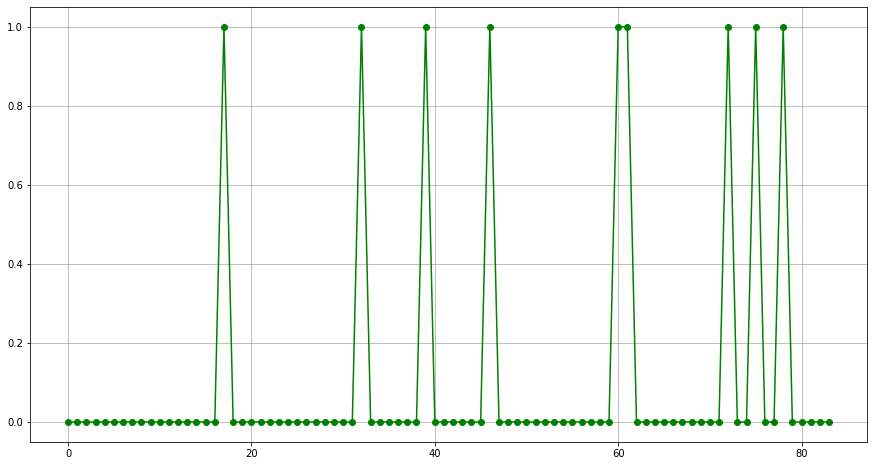

In [21]:
#graph of people sitting at the table during a timestamp.
plt.figure(figsize=(15,8))
plt.plot(range(84), people_on_table, 'g-`o')
plt.grid(True)

plt.show()
